Hello,

In this study, we will try to make an estimation on 2 sets of highly correlated columns on an existing dataset.

**Let's start!**

Firstly, we define our libraries and our database!

In [1]:
import numpy as np  # for mathematical operations
import pandas as pd # for data processing and csv file reading
import matplotlib.pyplot as plt # for data visualization.
#from sklearn.linear_model import LinearRegression # Regresyon tahmini için
from sklearn import svm,datasets   #to make the guess.
from sklearn.model_selection import train_test_split  #to make the guess.
from sklearn.preprocessing import PolynomialFeatures  #to make the guess.
import seaborn as sns  # to draw a heat map
import os
print(os.listdir("../input"))
data=pd.read_csv('../input/kc_house_data.csv')   #import data


['kc_house_data.csv']


We are calling the info function to obtain information about the database we have defined.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


Let us check with the heat map on our table for empty data.

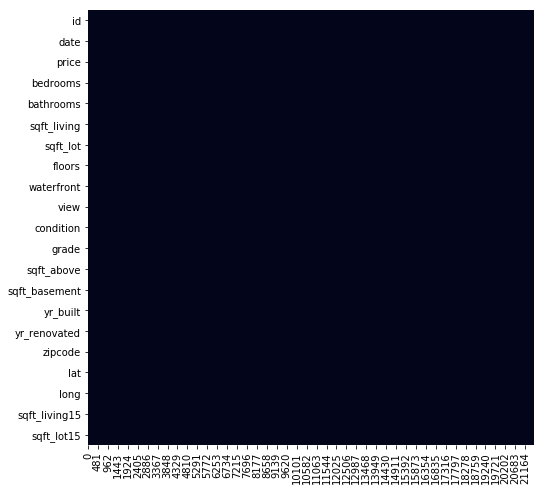

In [3]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.isnull(data.T), cbar=False)
plt.show()

When we look at the heat map, we see that there is no empty value .So there is no need to do the missing data filling process.

Let's see the columns of our database

In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

We call the 'shape' function to find out how many of our data and the number of columns.

In [5]:


data.shape

(21613, 21)

We are calling the head and tail functions to display the first 10 and end 10 values of our data.

In [6]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
data.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


When we examine the tables 'id', 'date', 'lat', 'long', 'zipcode' columns will not work for us, we're removing it from the table ** (Attribute Extracting!) **.

In [8]:

data.drop(["id","date","lat","long","zipcode"],axis=1,inplace=True)

data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


We use a histogram to see the distribution of our data.

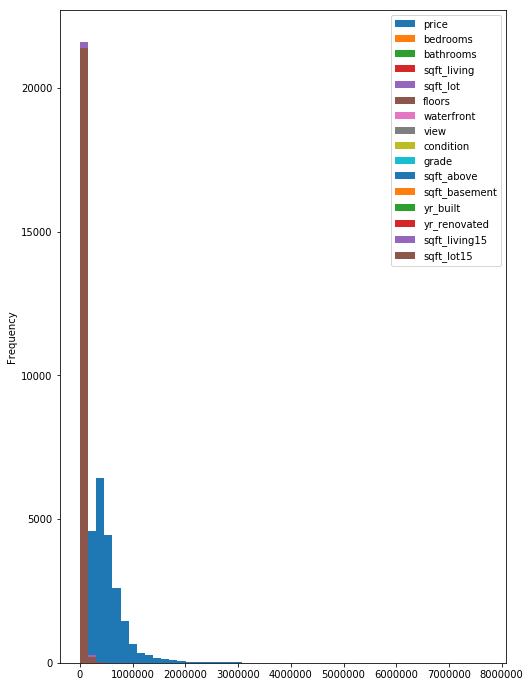

In [9]:
# Histogram
# bins = number of bar in figure
data.plot(kind = 'hist',bins = 50,figsize=(8, 12))
plt.show()

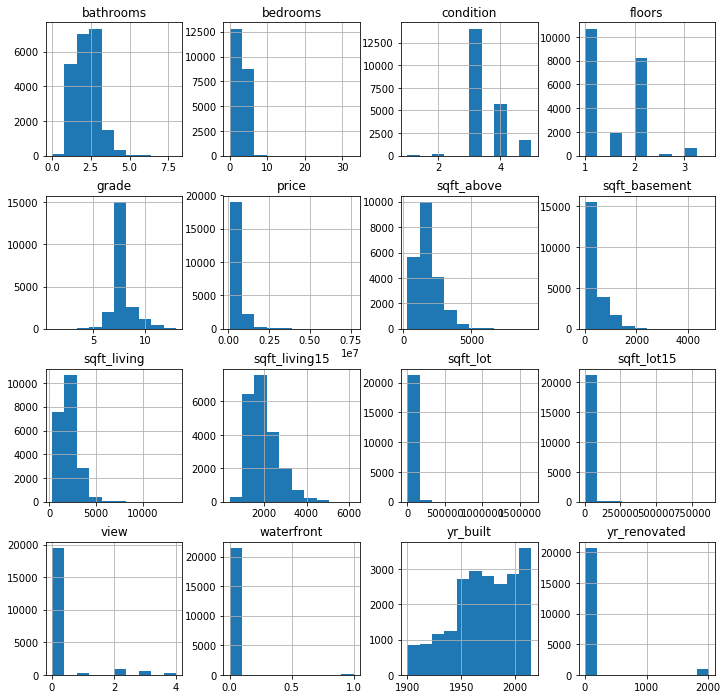

In [10]:
data.hist(figsize=(12, 12))
plt.show()

We call the describe function to see the mathematical ratios (total number, average, standard deviation, minimum value, lower end value, median, upper end value, maximum value) of our database.

In [11]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


We are calling the corr function to examine the correlation in our data.

In [12]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248


Simple (Dual) Correlation Definition:
When there are two measurements of an individual, it determines the relationship between these two variables. As a result of the correlation analysis, whether there is a linear relationship and the degree of this relationship, if any, is calculated by the correlation coefficient. The correlation coefficient is indicated by -1 r “and values between -1 and +1.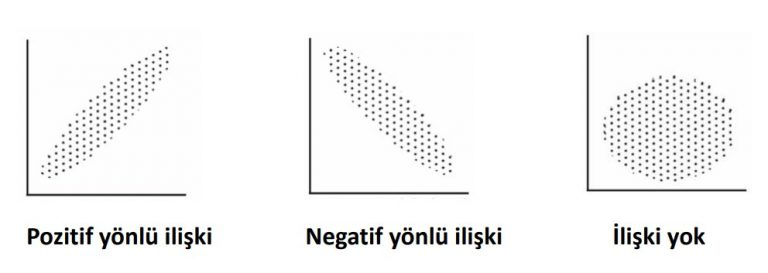


               The distribution of the data relationship is as follows.
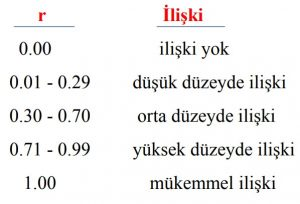

After the Corr function, we use the heatmap library to view the correlation distribution in detail by subtracting our heat map.

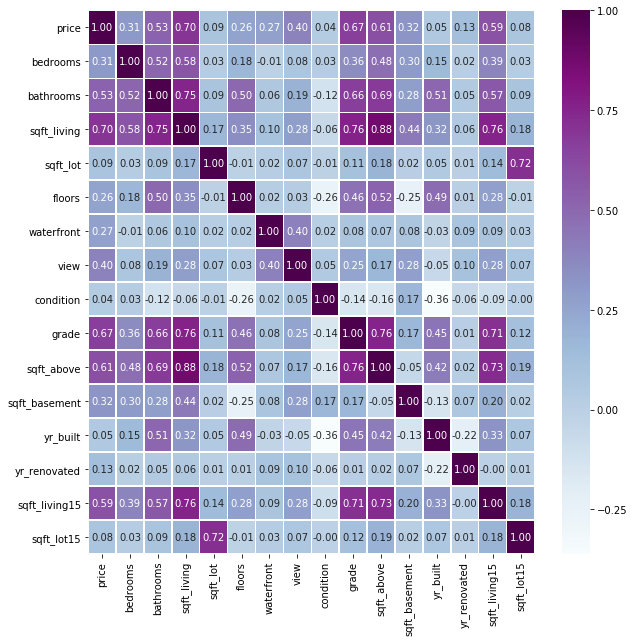

In [13]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5,linecolor='w',cmap="BuPu", fmt= '.2f',ax=ax)
plt.show()


** 'price' ** and ** 'sqft_living' ** We use the Scatter plot to examine the distribution between columns.

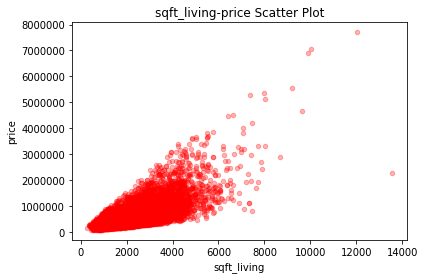

In [14]:
# Scatter Plot 
# x = sqft_living, y = price
data.plot(kind='scatter', x='sqft_living', y='price',alpha = 0.3,color = 'red',)
plt.xlabel('sqft_living')              #Name of 'X'
plt.ylabel('price')                    #Name of 'Y' 
plt.title('sqft_living-price Scatter Plot') #Name of Title
plt.show()


** We use the Scatter plot to examine the distribution between 'sqft_living' ** and ** 'grade' ** columns.

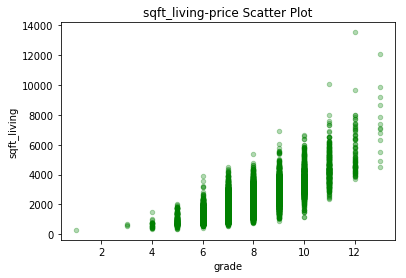

In [15]:
# Scatter Plot 
# x = sqft_living, y = price
data.plot(kind='scatter', x='grade', y='sqft_living',alpha = 0.3,color = 'green',)
plt.xlabel('grade')              #Name of 'X'
plt.ylabel('sqft_living')        #Name of 'Y' 
plt.title('sqft_living-price Scatter Plot') #Name of Title
plt.show()

** 'sqft_living' ** and ** 'sqft_above' ** We use the Scatter plot to examine the distribution between columns.

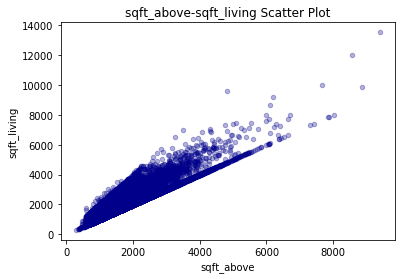

In [16]:
# Scatter Plot 
# x = sqft_above, y = sqft_living
data.plot(kind='scatter', x='sqft_above', y='sqft_living',alpha = 0.3,color = 'darkblue',)
plt.xlabel('sqft_above')             #Name of 'X'
plt.ylabel('sqft_living')            #Name of 'Y'
plt.title('sqft_above-sqft_living Scatter Plot') #Name of Title
plt.show()

Let's do min-max Normalization using some Columns.

In [17]:
def minmax(data):
    l = np.min(data)
    h = np.max(data)
    return (data -l) / (h-l)
dataMinmax=pd.DataFrame()
dataMinmax["Min-Max_Normalization_price"]=minmax(data.price)
dataMinmax["Min-Max_Normalization_sqft_above"]=minmax(data.sqft_above)
dataMinmax["Min-Max_Normalization_sqft_living"]=minmax(data.sqft_living)
dataMinmax["Min-Max_Normalization_grade"]=minmax(data.grade)

dataMinmax.head()

,Min-Max_Normalization_price,Min-Max_Normalization_sqft_above,Min-Max_Normalization_sqft_living,Min-Max_Normalization_grade
0,0.019266,0.097588,0.067170,0.500000
1,0.060721,0.206140,0.172075,0.500000
2,0.013770,0.052632,0.036226,0.416667
3,0.069377,0.083333,0.126038,0.500000
4,0.057049,0.152412,0.104906,0.583333


Let's make the standard deviation Normalization using some Columns.

In [18]:
def standard_norm(arr):
    mean = np.mean(arr)
    stdev = np.std(arr)
    return (arr-mean)/stdev

dataStandard_norm=pd.DataFrame()
dataStandard_norm["Standart_Sapma_Normalization_price"]=standard_norm(data.price)
dataStandard_norm["Standart_Sapma_Normalization_sqft_above"]=standard_norm(data.sqft_above)
dataStandard_norm["Standart_Sapma_Normalization_sqft_living"]=standard_norm(data.sqft_living)
dataStandard_norm["Standart_Sapma_Normalization_grade"]=standard_norm(data.grade)
dataStandard_norm.head(10)

,Standart_Sapma_Normalization_price,Standart_Sapma_Normalization_sqft_above,Standart_Sapma_Normalization_sqft_living,Standart_Sapma_Normalization_grade
0,-0.866717,-0.734708,-0.979835,-0.558836
1,-0.005688,0.460841,0.533634,-0.558836
2,-0.980849,-1.229834,-1.426254,-1.409587
3,0.174090,-0.891699,-0.130550,-0.558836
4,-0.081958,-0.130895,-0.435422,0.291916
5,1.865641,2.537955,3.636791,2.844170
6,-0.769746,-0.088628,-0.397313,-0.558836
7,-0.676180,-0.879623,-1.110494,-0.558836
8,-0.846016,-0.891699,-0.326539,-0.558836
9,-0.591330,0.122706,-0.206768,-0.558836


Let's do logarithm normalization using some columns.

In [19]:
dataLogaritmik_Norm=pd.DataFrame()
dataLogaritmik_Norm["Logaritmik_Sapma_Normalization_price"]=np.log(data.price)
dataLogaritmik_Norm["Logaritmik_Sapma_Normalization_sqft_above"]=np.log(data.sqft_above)
dataLogaritmik_Norm["Logaritmik_Sapma_Normalization_sqft_living"]=np.log(data.sqft_living)
dataLogaritmik_Norm["Logaritmik_Sapma_Normalization_grade"]=np.log(data.grade)
dataLogaritmik_Norm.head(10)

,Logaritmik_Sapma_Normalization_price,Logaritmik_Sapma_Normalization_sqft_above,Logaritmik_Sapma_Normalization_sqft_living,Logaritmik_Sapma_Normalization_grade
0,12.309982,7.073270,7.073270,1.945910
1,13.195614,7.682482,7.851661,1.945910
2,12.100712,6.646391,6.646391,1.791759
3,13.311329,6.956545,7.580700,1.945910
4,13.142166,7.426549,7.426549,2.079442
5,14.018451,8.266164,8.597851,2.397895
6,12.458775,7.447168,7.447168,1.945910
7,12.583995,6.966024,6.966024,1.945910
8,12.343658,6.956545,7.484369,1.945910
9,12.685408,7.544332,7.544332,1.945910


Let's do Square root Normalization using some Columns.

In [20]:
dataKarekok_Norm=pd.DataFrame()
dataKarekok_Norm["Karekok_Normalization_price"]=np.sqrt(data.price)
dataKarekok_Norm["Karekok_Normalization_sqft_above"]=np.sqrt(data.sqft_above)
dataKarekok_Norm["Karekok_Normalization_sqft_living"]=np.sqrt(data.sqft_living)
dataKarekok_Norm["Karekok_Normalization_grade"]=np.sqrt(data.grade)
dataKarekok_Norm.head(10)

,Karekok_Normalization_price,Karekok_Normalization_sqft_above,Karekok_Normalization_sqft_living,Karekok_Normalization_grade
0,471.062629,34.351128,34.351128,2.645751
1,733.484833,46.583259,50.695167,2.645751
2,424.264069,27.748874,27.748874,2.449490
3,777.174369,32.403703,44.271887,2.645751
4,714.142843,40.987803,40.987803,2.828427
5,1106.797181,62.369865,73.620649,3.316625
6,507.444578,41.412558,41.412558,2.645751
7,540.231432,32.557641,32.557641,2.645751
8,479.061583,32.403703,42.190046,2.645751
9,568.330890,43.474130,43.474130,2.645751


According to the data, we can start the **** 'sqft_living' - 'price' **** 1.model training.

First, let's put data into variables

In [21]:
X=data.sqft_living[:100].values #sqft_living values
Y=data.price[:100].values #price values
X=X.reshape(100,1)   
Y=Y.reshape(100,1)


Let's separate the data.

In [22]:
X_train=np.array(data.sqft_living[:100])   #Assigning the first 100 elements to X_train
X_test=np.array(data.sqft_living[100:])    #Assigning the first 100 elements to X_test
y_train=np.array(data.price[:100])         #Assigning the first 100 elements to y_train
y_test=np.array(data.price[100:])          #Assigning the first 100 elements to y_test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  #split data


Let's define the regression and create the model

In [23]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train)    #creating the appropriate model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's look at the cutting point and the slope of our model.

In [24]:
print("Kesim noktası:", model.intercept_)
b=model.intercept_

Kesim noktası: [44207.42901176]


In [25]:
print("Eğim:", model.coef_)
m= model.coef_

Eğim: [[228.85619918]]


Let's create our forecasts.

In [26]:
y_pred = model.predict(X_test) 

Let's examine the distribution of data and the truth that we have found.

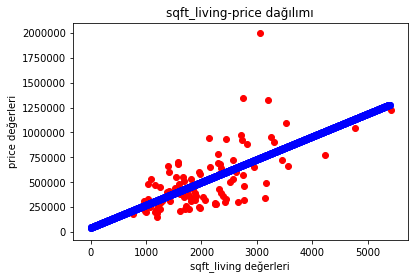

In [27]:
a=np.arange(5400)
plt.scatter(X,Y,color="red")  
plt.scatter(a,m*a+b,color='b',alpha=0.3) 
plt.title('sqft_living-price dağılımı')  
plt.xlabel('sqft_living değerleri')  
plt.ylabel('price değerleri')
plt.show() 

Let's compare the results with the actual results in a table

In [28]:
df = pd.DataFrame({'Gerçek':[each for each in  y_test] ,'Tahmin Edilen':[each for each in  y_pred]})  
df.head(20)

,Gerçek,Tahmin Edilen
0,[937000.0],[604905.1170079424]
1,[305000.0],[652964.9188361863]
2,[180000.0],[220426.7023819911]
3,[885000.0],[691870.4726971457]
4,[832500.0],[829184.192206414]
5,[430000.0],[405800.2237195033]
6,[395000.0],[476745.64546595863]
7,[360000.0],[588885.1830651944]
8,[920000.0],[668984.8527789343]
9,[905000.0],[799432.8863127392]


When we look at the table above, we see that the values are sometimes close to each other (4th and 5th column) but they are mostly different values because the correlation is the distance from 1 (** Correlation = 0.702035 **) .If the correlation value is high, more consistent results we were received.

**** 'sqft_living' - 'price' **** Let's create another model using SVC model techniques.

In [29]:
X_train=X_train.reshape(-1,1)            #Recalibrate the dimensions of x_train
y_train=y_train.reshape(-1,1)            #Recalibrate the dimensions of  y_train
X_test=X_test.reshape(-1,1)              #Recalibrate the dimensions of X_test 
y_test=y_test.reshape(-1,1)              #Recalibrate the dimensions of y_test

classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

clf=svm.SVC(kernel='linear',C=1.0)
clf.fit(X_train,y_train)



/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Let's look at the cutting point and the slope of our model.

In [30]:

print("Kesim noktası:", clf.intercept_)
b2=clf.intercept_

Kesim noktası: [-59.         -11.         -10.42857143 ... -13.31767338 -41.66666667
  19.53872054]


In [31]:
print("Eğim:",clf.coef_)
m2= clf.coef_

Eğim: [[ 0.05      ]
 [ 0.01      ]
 [ 0.00952381]
 ...
 [ 0.00447427]
 [ 0.01333333]
 [-0.00673401]]


Let's create our forecasts.

In [32]:

y2_pred = clf.predict(X_test) 


Let's compare the results with the actual results in a table

In [33]:
df["Tahmin Edilen-2"]=[each for each in  y2_pred]
df.head(20)

,Gerçek,Tahmin Edilen,Tahmin Edilen-2
0,[937000.0],[604905.1170079424],650000.0
1,[305000.0],[652964.9188361863],650000.0
2,[180000.0],[220426.7023819911],315000.0
3,[885000.0],[691870.4726971457],650000.0
4,[832500.0],[829184.192206414],720000.0
5,[430000.0],[405800.2237195033],700000.0
6,[395000.0],[476745.64546595863],323000.0
7,[360000.0],[588885.1830651944],650000.0
8,[920000.0],[668984.8527789343],650000.0
9,[905000.0],[799432.8863127392],951000.0


In this model, we see that there are very different values from the real result and the reason is that the correlation is not high **...

Let's examine the model's Complexity Matrix and examine the ACC, Precision and Recall values.

In [34]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
weighted_prediction = clf.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, weighted_prediction))
print ('F1 score:', f1_score(y_test, weighted_prediction,average='weighted'))
print ('Recall:', recall_score(y_test, weighted_prediction,
                              average='weighted'))
print ('Precision:', precision_score(y_test, weighted_prediction,average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, weighted_prediction))
print ('\n confussion matrix:\n',confusion_matrix(y_test, weighted_prediction))






Accuracy: 0.0
F1 score: 0.0
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

    153000.0       0.00      0.00      0.00         1
    180000.0       0.00      0.00      0.00         1
    189000.0       0.00      0.00      0.00         0
    229500.0       0.00      0.00      0.00         1
    243500.0       0.00      0.00      0.00         0
    252700.0       0.00      0.00      0.00         0
    285000.0       0.00      0.00      0.00         1
    291850.0       0.00      0.00      0.00         1
    305000.0       0.00      0.00      0.00         1
    315000.0       0.00      0.00      0.00         0
    323000.0       0.00      0.00      0.00         0
    329000.0       0.00      0.00      0.00         1
    349000.0       0.00      0.00      0.00         0
    360000.0       0.00      0.00      0.00         1
    395000.0       0.00      0.00      0.00         1
    400000.0       0.00      0.00      0.00         1
 

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning

When we examine the ACC, Precision and Recall values, we see that they are all 0 because none of the values are exactly the same as the actual result!


** As a result, it is seen that the correlation is very low when looking at the heat map, this shows that the data do not have any relation with each other, so the data do not change in proportion to each other.This data set is not suitable for forecasting.**